# Using notebooks

In [138]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_theme(style="darkgrid")

#### Import all necessary data from the kba website.

In [139]:
cols2skip = [0,6,7,8,9,10,11,15,16,17,18,19,20] #cut out the excel sheet
cols = [i for i in range(100) if i not in cols2skip]
df = pd.read_excel("fz10_2020_10_xlsx.xlsx",sheet_name="FZ10.1",skiprows=8, usecols=cols, skipfooter=8)

df.head(10)

,Marke,Marke/Modellreihe,Oktober 2020,Jan.-\nOktober 2020,Anteil \nin %,Oktober 2020.3,Jan.-\nOktober 2020.3,Anteil \nin %.3
0,ALFA ROMEO,ALFA GIULIETTA,83,474,18.9,-,-,-
1,NaN,GIULIA,100,788,31.5,-,-,-
2,NaN,STELVIO,176,1241,49.6,-,-,-
3,ALFA ROMEO ZUSAMMEN,NaN,359,2503,0.1,-,-,-
4,ALPINE,A110,10,143,100.0,-,-,-
5,ALPINE ZUSAMMEN,NaN,10,143,0.0,-,-,-
6,ASTON MARTIN,DBX,11,23,10.6,-,-,-
7,NaN,DB11,10,151,69.3,-,-,-
8,NaN,SONSTIGE,5,44,20.2,-,-,-
9,ASTON MARTIN ZUSAMMEN,NaN,26,218,0.0,-,-,-


#### Cleanup

In [140]:
df.columns = ["manufacturer","model","all_oct","all_ytd","all_percent","ev_oct","ev_ytd","ev_percent"]
cols = ["all_oct","ev_oct","ev_ytd","ev_percent"] 

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df[["ev_oct","ev_ytd","ev_percent"]] = df[["ev_oct","ev_ytd","ev_percent"]].fillna(value=0)
df[["manufacturer","model"]] = df[["manufacturer","model"]].fillna(method='ffill')
df= df[~df['manufacturer'].str.contains('ZUSAMMEN')]
df.head(20)

,manufacturer,model,all_oct,all_ytd,all_percent,ev_oct,ev_ytd,ev_percent
0,ALFA ROMEO,ALFA GIULIETTA,83.0,474,18.9,0.0,0.0,0.0
1,ALFA ROMEO,GIULIA,100.0,788,31.5,0.0,0.0,0.0
2,ALFA ROMEO,STELVIO,176.0,1241,49.6,0.0,0.0,0.0
4,ALPINE,A110,10.0,143,100.0,0.0,0.0,0.0
6,ASTON MARTIN,DBX,11.0,23,10.6,0.0,0.0,0.0
7,ASTON MARTIN,DB11,10.0,151,69.3,0.0,0.0,0.0
8,ASTON MARTIN,SONSTIGE,5.0,44,20.2,0.0,0.0,0.0
10,AUDI,"A1, S1",1234.0,11463,6.5,17.0,109.0,1.6
11,AUDI,"A3, S3, RS3",3290.0,26495,15.1,0.0,0.0,0.0
12,AUDI,"A4, S4, RS4",3364.0,29820,17.0,0.0,0.0,0.0


#### Printing chart Monthly

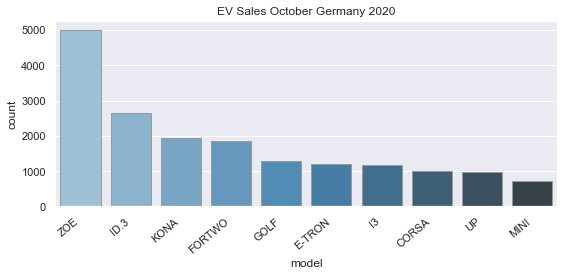

In [141]:
evMonthlyFrame = pd.DataFrame()

evMonthlyFrame['manufacturer'] = df['manufacturer']
evMonthlyFrame['model'] = df['model']
evMonthlyFrame['count'] = df['ev_oct']
#printingFrame = printingFrame.dropna()
evMonthlyFrame.sort_values(by='count',ascending=False, inplace=True)

plt.figure(figsize=(8,4))
barplot= sns.barplot(x=evMonthlyFrame['model'].head(10) ,
            y=evMonthlyFrame['count'].head(10),
            palette="Blues_d",
            edgecolor=".6");

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
barplot.set_title("EV Sales October Germany 2020")
barplot.set_label("dsdd")
plt.tight_layout()
plt.show()

#### Printing chart ytd

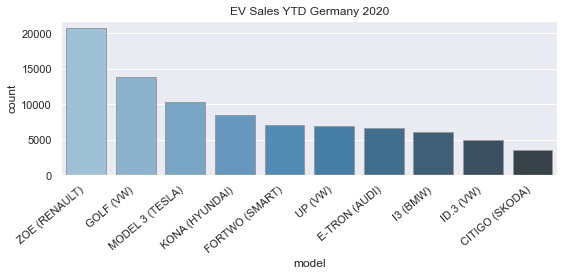

In [142]:
evYtdFrame = pd.DataFrame()

evYtdFrame['manufacturer'] = df['manufacturer']
evYtdFrame['model'] = df['model'] + " (" + + df['manufacturer'] + ")"
evYtdFrame['count'] = df['ev_ytd']
evYtdFrame.sort_values(by='count',ascending=False, inplace=True)

plt.figure(figsize=(8,4))
barplot= sns.barplot(x=evYtdFrame['model'].head(10) ,
            y=evYtdFrame['count'].head(10),
            palette="Blues_d",
            edgecolor=".6");

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
barplot.set_title("EV Sales YTD Germany 2020")
plt.tight_layout()
plt.show()




